In [1]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist

In [2]:
data = pd.read_csv("C:/Users/haris/Downloads/assignment ds/pca/wine.csv")

In [3]:
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data.shape

(178, 14)

In [5]:
# as per statement we are having 3 cluster but for pca calculation we're gonna ignore type column:
df = data.iloc[:,1:]
df.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
df.shape

(178, 13)

In [7]:
# apply PCA on normalized data :
pcs = PCA(n_components=13)
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)
df_norm = norm_func(df)
df_norm.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


In [8]:
#apply pca
pcs_values = pcs.fit_transform(df_norm)
pcs_df = pd.DataFrame(pcs_values)
pcs_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.706336,-0.253193,0.024093,0.013263,-0.026580,-0.074364,0.065172,0.138519,0.118627,0.277443,0.049711,-0.020012,-0.008723
1,-0.484977,-0.008823,-0.280482,0.075898,-0.238634,-0.071877,0.000686,-0.181193,0.028066,0.114948,0.074158,-0.050838,-0.005249
2,-0.521172,-0.189187,0.196217,-0.015784,0.045045,0.087116,0.125605,0.023178,-0.222133,-0.017270,0.012131,-0.104184,-0.023164
3,-0.821644,-0.580906,0.081110,0.012235,-0.004805,0.081987,-0.068418,-0.152253,-0.009376,0.061897,-0.090261,0.103306,-0.052921
4,-0.202546,-0.059467,0.300240,-0.102051,0.105777,-0.116790,0.057188,-0.009455,0.149605,-0.003043,-0.019021,-0.084094,-0.034172


In [9]:
var = (pcs.explained_variance_ratio_)*100
cumvar = np.cumsum(np.round(var, decimals=4))
cumvar

array([ 40.7495,  59.7199,  68.2816,  75.7083,  81.2736,  85.9324,
        89.5963,  92.0051,  94.2795,  96.5305,  97.9118,  99.185 ,
       100.0001])

In [10]:
# now we're retriving first 3 pcs as per problem statement :  (68.2816 %)
final_pcs_df = pcs_df.iloc[:,0:3]
final_pcs_df.head()

,0,1,2
0,-0.706336,-0.253193,0.024093
1,-0.484977,-0.008823,-0.280482
2,-0.521172,-0.189187,0.196217
3,-0.821644,-0.580906,0.081110
4,-0.202546,-0.059467,0.300240


In [11]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(final_pcs_df)
kmeans_labels = kmeans.labels_
cluster_center = kmeans.cluster_centers_
cluster_center

array([[-0.48503975, -0.17742871, -0.0046045 ],
       [ 0.01701227,  0.36612572,  0.01352436],
       [ 0.59750634, -0.21895939, -0.01057291]])

In [12]:
final_pcs_df["k_clustered"] = pd.Series(kmeans_labels)
final_pcs_df.head()

<ipython-input-12-c97a0452a780>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_pcs_df["k_clustered"] = pd.Series(kmeans_labels)


,0,1,2,k_clustered
0,-0.706336,-0.253193,0.024093,0
1,-0.484977,-0.008823,-0.280482,0
2,-0.521172,-0.189187,0.196217,0
3,-0.821644,-0.580906,0.081110,0
4,-0.202546,-0.059467,0.300240,0


In [13]:
kmeans_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

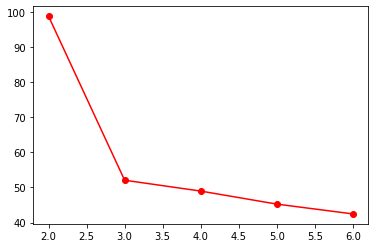

In [14]:
# Elbow graph :
k = list(range(2,7))
twss = []
for i in k:
    loop_kmeans = KMeans(n_clusters=i)
    loop_kmeans.fit(final_pcs_df)
    wss = []
    for j in range(i):
        wss.append(sum(cdist(final_pcs_df.iloc[loop_kmeans.labels_==j], loop_kmeans.cluster_centers_[j].reshape(1, final_pcs_df.shape[1]), 'euclidean')))
    twss.append(sum(wss))
plt.plot(k, twss, 'ro-')
plt.show()

In [15]:
# from above Elbow graph it is clear that optimum k value is 3.
# graph for original data (Without applying PCA):
new_df = pcs_df.iloc[:,0:2]
new_df["pre_clustered"] = data['Type']
new_df.head()

<ipython-input-15-a171d929b628>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["pre_clustered"] = data['Type']


,0,1,pre_clustered
0,-0.706336,-0.253193,1
1,-0.484977,-0.008823,1
2,-0.521172,-0.189187,1
3,-0.821644,-0.580906,1
4,-0.202546,-0.059467,1


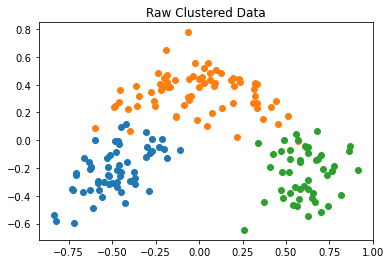

In [16]:
plt.scatter(new_df[0].loc[new_df.pre_clustered==1], new_df[1].loc[new_df.pre_clustered==1])
plt.scatter(new_df[0].loc[new_df.pre_clustered==2], new_df[1].loc[new_df.pre_clustered==2])
plt.scatter(new_df[0].loc[new_df.pre_clustered==3], new_df[1].loc[new_df.pre_clustered==3])
plt.title("Raw Clustered Data")
plt.show()

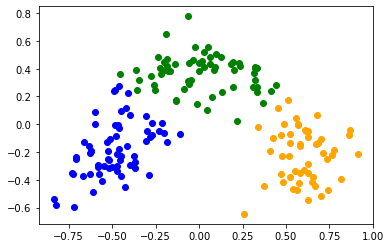

In [17]:
# Graph of data after applying PCA :
plt.scatter(final_pcs_df[0].loc[kmeans_labels==0], final_pcs_df[1].loc[kmeans_labels==0], c="blue")
plt.scatter(final_pcs_df[0].loc[kmeans_labels==1], final_pcs_df[1].loc[kmeans_labels==1], c="green")
plt.scatter(final_pcs_df[0].loc[kmeans_labels==2], final_pcs_df[1].loc[kmeans_labels==2], c="orange")


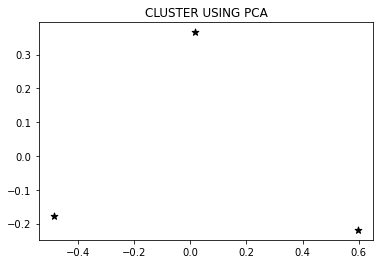

In [18]:
# for Cluster center point :
plt.scatter(cluster_center[0][0], cluster_center[0][1], marker='*', s=50, c="black")
plt.scatter(cluster_center[1][0], cluster_center[1][1], marker='*', s=50, c="black")
plt.scatter(cluster_center[2][0], cluster_center[2][1], marker='*', s=50, c="black")
plt.title("CLUSTER USING PCA")
plt.show()

In [ ]:
# there for we can say that, number of cluster from original data is same as derived clusters(KMeans) using principal component analysis.